### Importing Necessary Libraries

In [96]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/Asus/Downloads/ineu/pollution.csv")
df = pd.DataFrame(df)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Data Preprocessing

In [97]:
print(df.isna().sum())

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64


In [98]:
df = df.iloc[:,1:]
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [99]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.0+ MB
None


In [100]:
df['Iws'] = df['Iws'].astype('int64')
df['TEMP'] = df['TEMP'].astype('int64')
df['PRES'] = df['PRES'].astype('int64')
df['PRES']*=0.000987

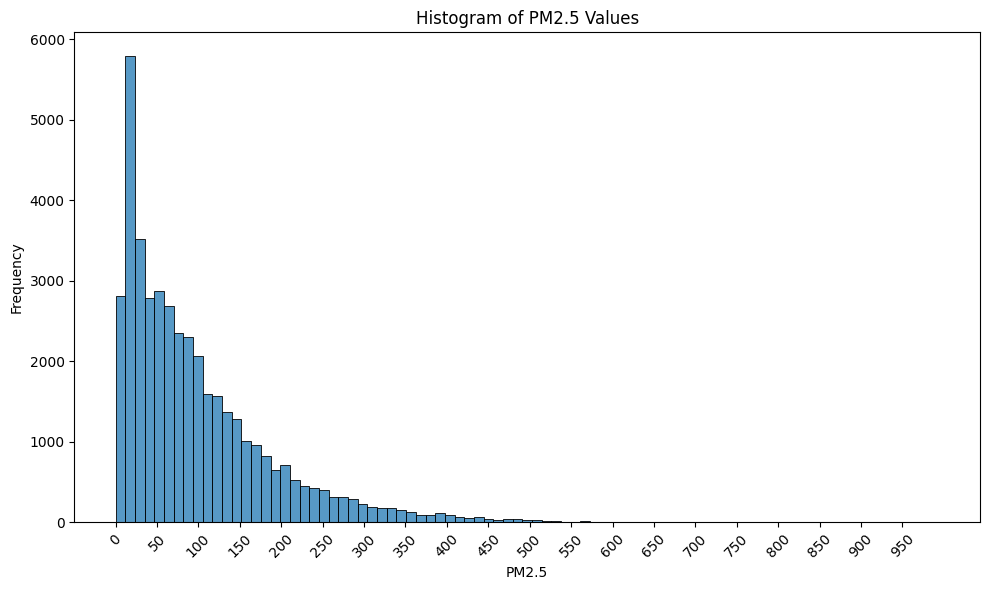

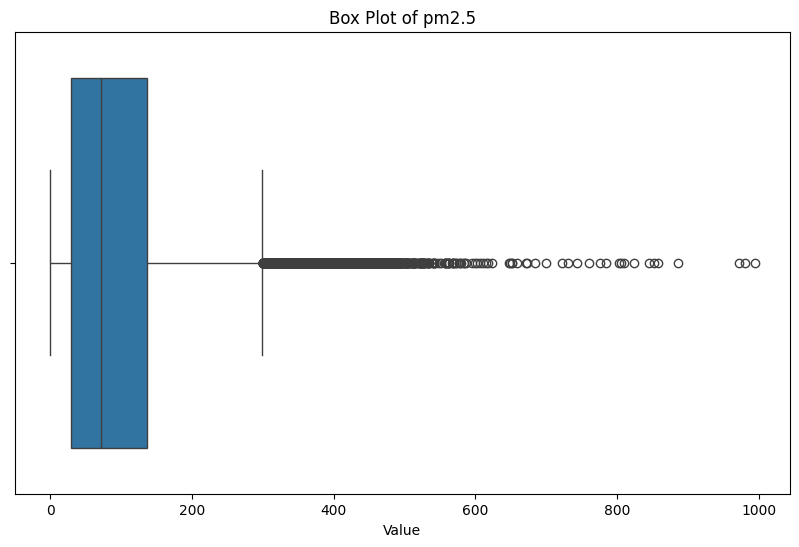

In [101]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='pm2.5', bins=85)  # Adjust the number of bins as needed
plt.xticks(rotation=45) # Rotate x-axis labels for better readability

plt.title('Histogram of PM2.5 Values')
plt.xticks(range(0,1000,50))
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['pm2.5'])
plt.title('Box Plot of pm2.5')
plt.xlabel('Value')
plt.show()


Since distribution is right skewed and outliers exist replacing with median is more suited

In [102]:
df['pm2.5'].fillna(df['pm2.5'].median(),inplace=True)
df['pm2.5'] = df['pm2.5'].astype('int64')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   43824 non-null  int64  
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  int64  
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  int64  
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 4.0+ MB


In [104]:
#cv is not valid wind direction , so all rows containing cv are replaced with valid data

counts = df['cbwd'].value_counts()
print(counts)
total_counts = counts['SE'] + counts['NW'] + counts['NE']

# Calculate proportions
se_proportion = counts['SE'] / total_counts
nw_proportion = counts['NW'] / total_counts
ne_proportion = counts['NE'] / total_counts

# Get indices of 'cv' values
cv_indices = df.index[df['cbwd'] == 'cv'].tolist()
num_cv = len(cv_indices)
# Generate replacement values
replacements = np.random.choice(['SE', 'NW', 'NE'], size=num_cv, p=[se_proportion, nw_proportion, ne_proportion])

# Replace 'cv' values
df.loc[cv_indices, 'cbwd'] = replacements

print(df['cbwd'].value_counts())

cbwd
SE    15290
NW    14150
cv     9387
NE     4997
Name: count, dtype: int64
cbwd
SE    19406
NW    17987
NE     6431
Name: count, dtype: int64


In [105]:
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,97.357977,1.817246,12.448499,1.003234,23.305654,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,90.030249,14.433440,12.198612,0.010135,50.051667,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,0.978117,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,0.994896,1.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1.002792,5.000000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1.011675,21.000000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1.032402,585.000000,27.000000,36.000000


In [106]:

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Encoding combined wind direction (cbwd)
df["cbwd"] = labelencoder.fit_transform(df["cbwd"])
df["cbwd"].unique()
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,72,-21,-11,1.007727,1,1,0,0
1,2010,1,1,1,72,-21,-12,1.006740,1,4,0,0
2,2010,1,1,2,72,-21,-11,1.005753,1,6,0,0
3,2010,1,1,3,72,-21,-14,1.005753,1,9,0,0
4,2010,1,1,4,72,-20,-12,1.004766,1,12,0,0


<Axes: >

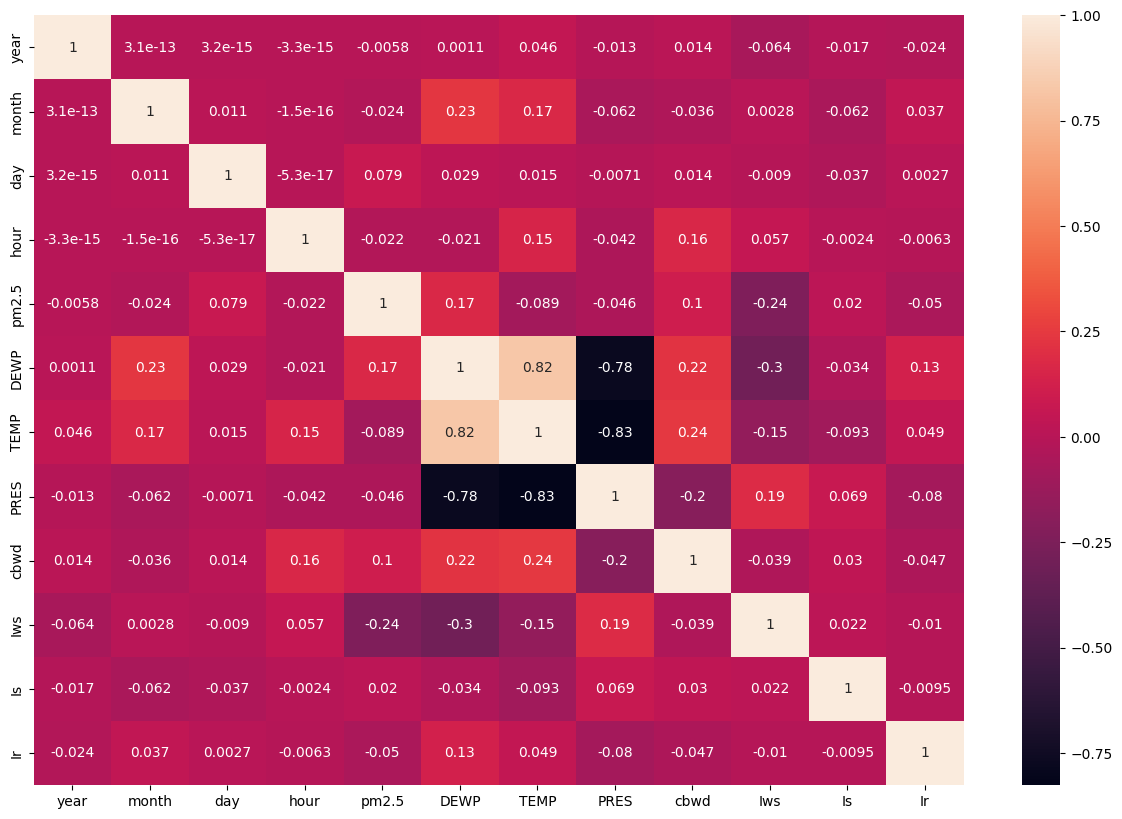

In [109]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

pm2.5 has highest negative correlation of 0.24 with Iws(windspeed)

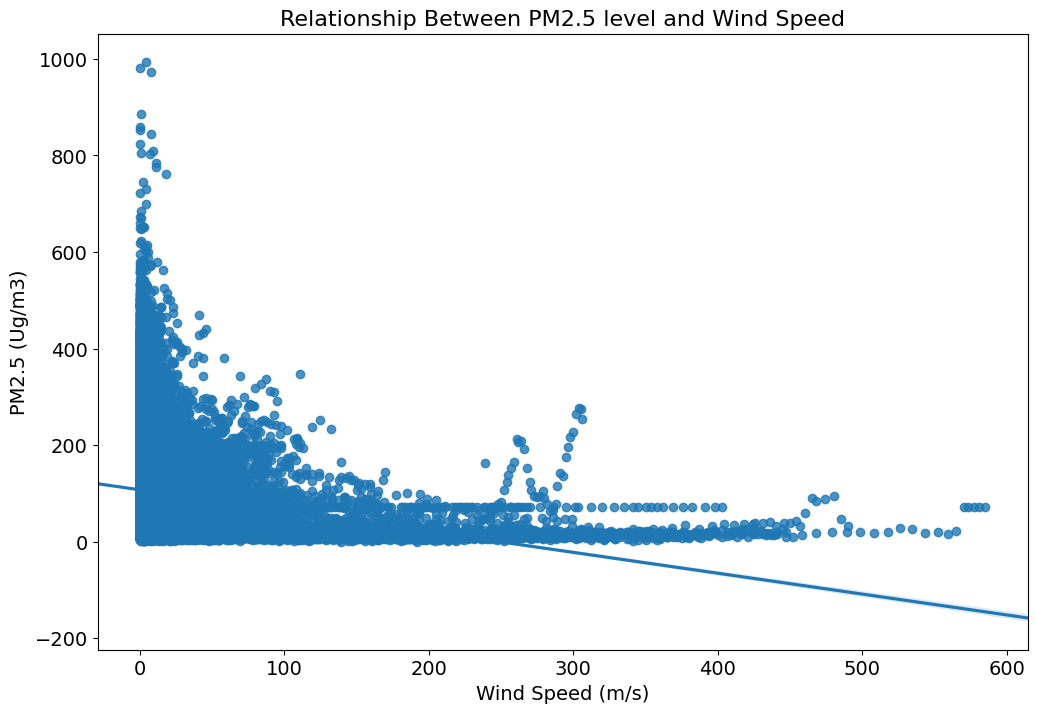

In [110]:
plt.figure(figsize= (12,8))
sns.regplot(x = 'Iws', y = 'pm2.5', data = df, truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 (Ug/m3)', fontsize = 14)
plt.xlabel("Wind Speed (m/s)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Wind Speed", fontsize= 16)
plt.show()

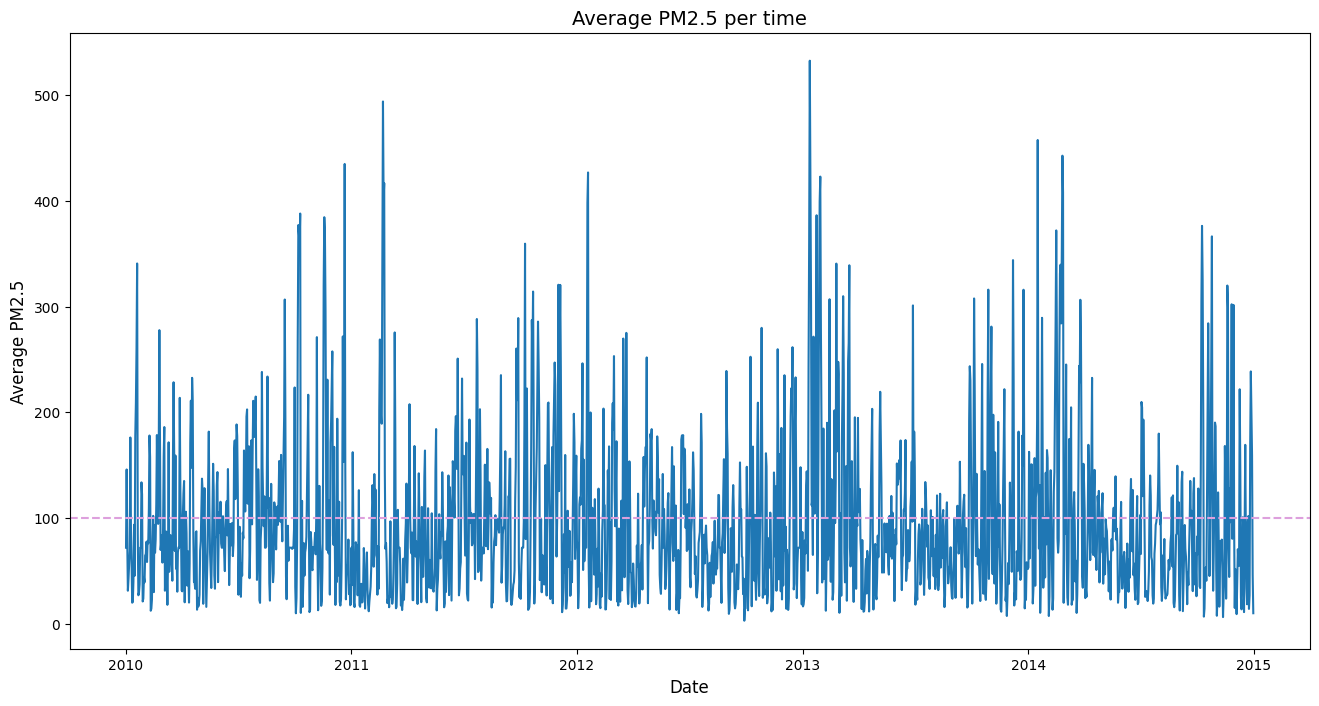

In [111]:
#Adding date column to better visualize pm2.5 year wise
date=df[['year','month','day']].apply(lambda x: '-'.join(x.values.astype(str)),axis='columns')
df.insert(5,'date',date)
df['date']=pd.to_datetime(df['date'])

date = df.groupby('date')['pm2.5'].mean()
plt.figure(figsize= [16, 8])
sns.lineplot(x = date.index, y = date)
plt.axhline(100, ls= '--', color= 'plum')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.show()

pm2.5 recorded highest in 2013

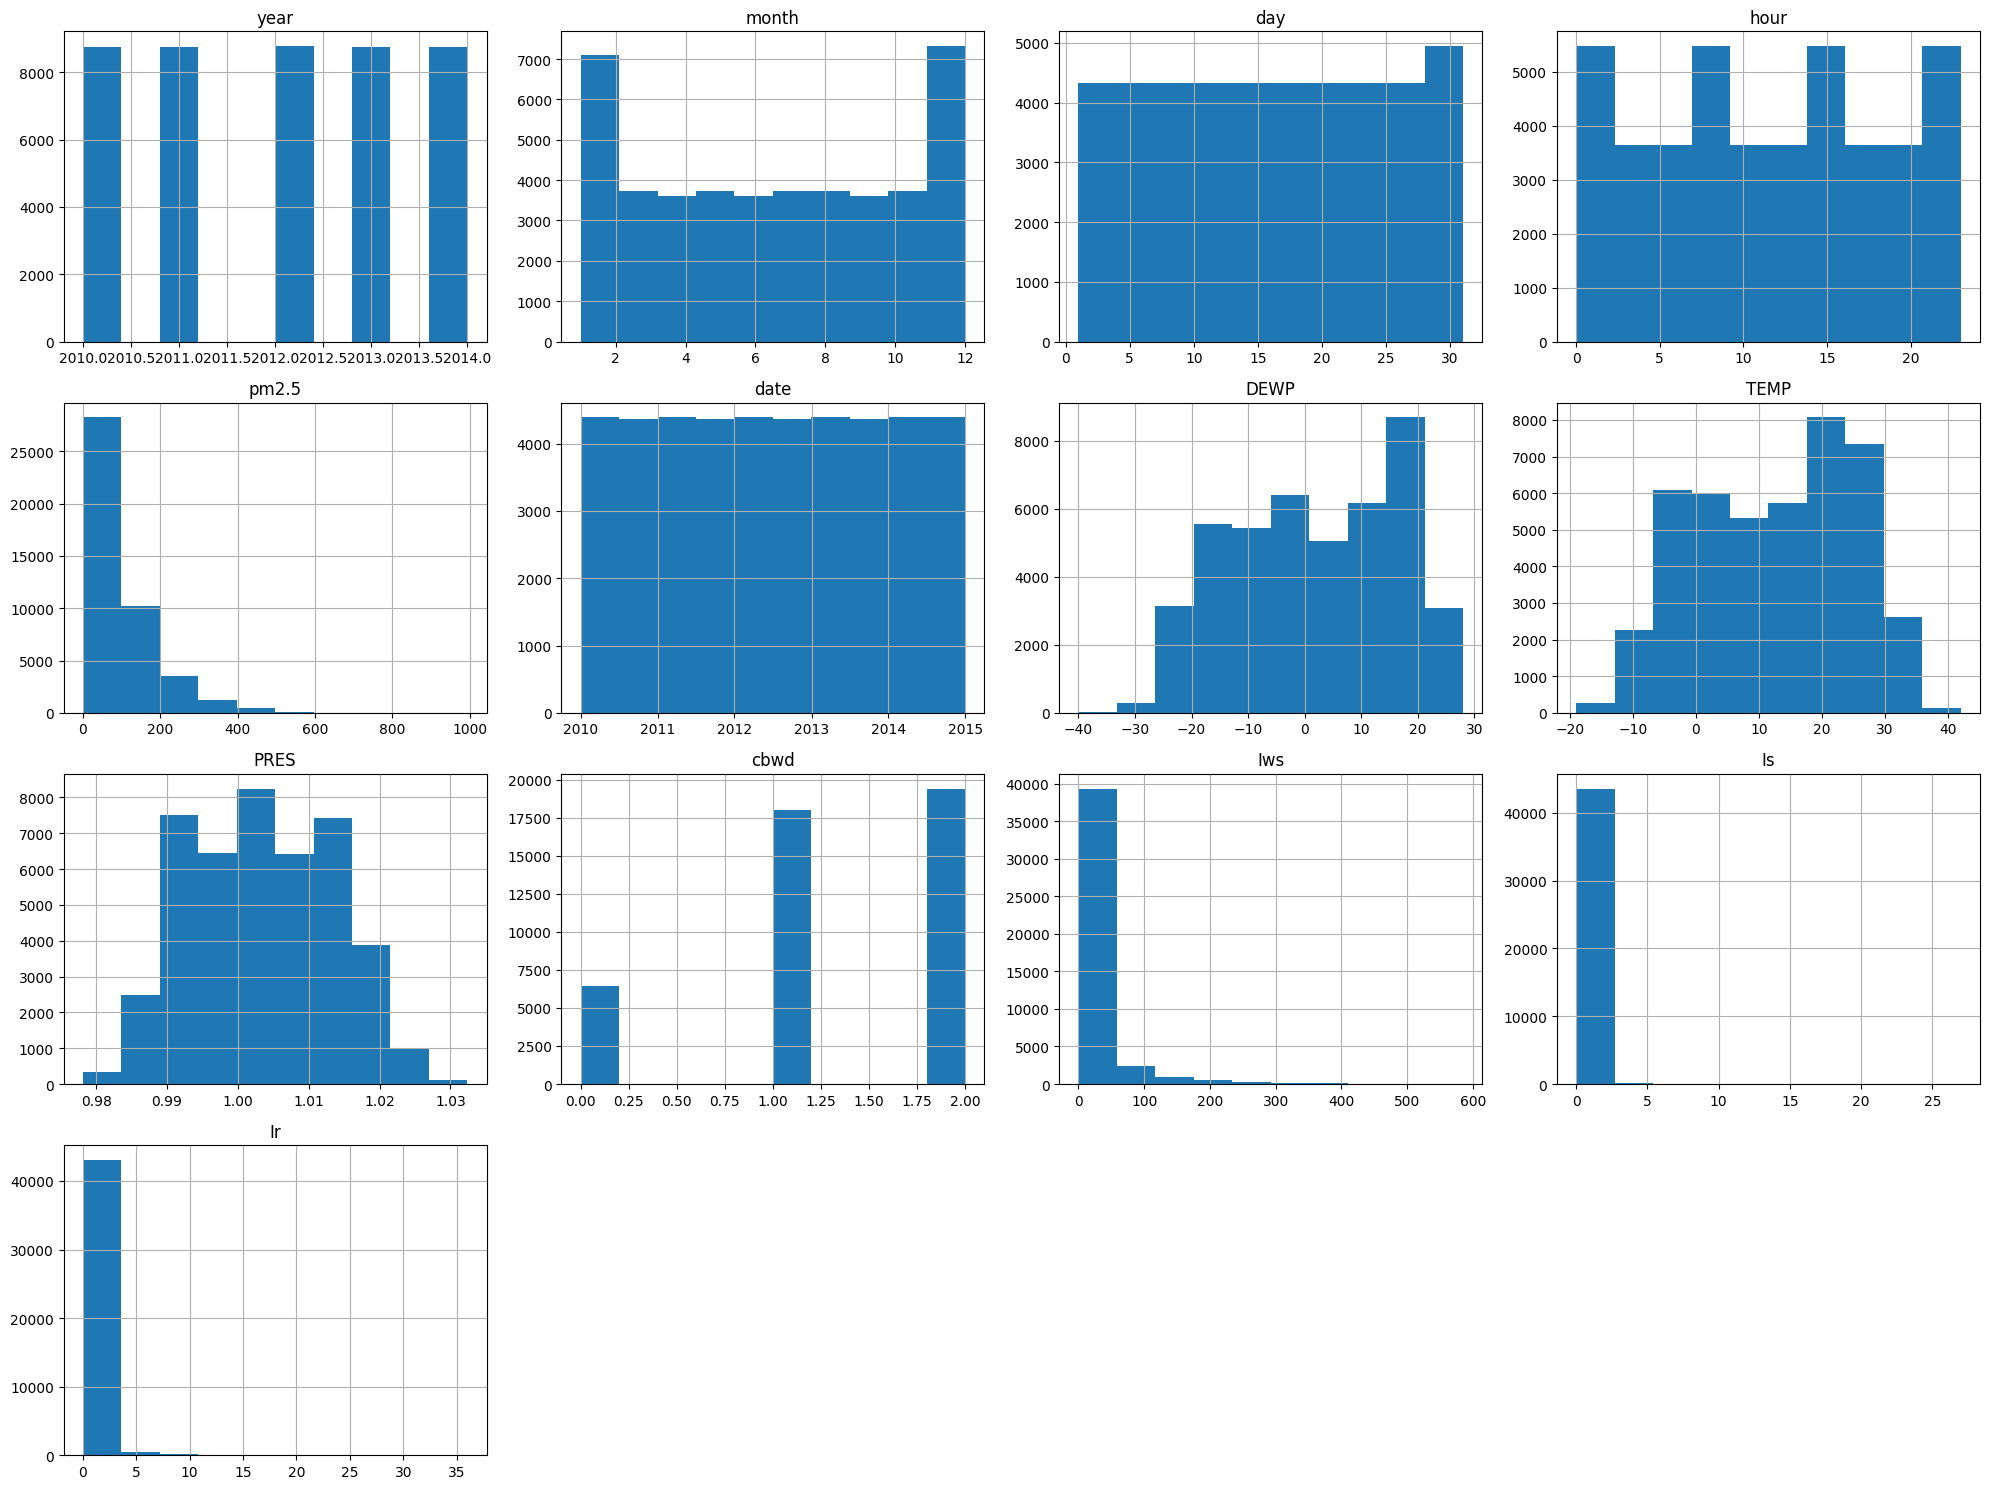

In [112]:
df.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

### Model Implementation

In [113]:
X=df.drop(['month','hour','day','date','pm2.5'],axis=1)
y=df['pm2.5']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [115]:
ridge=Ridge()
bagging_ridge = BaggingRegressor(estimator=ridge, random_state=42)
params={'n_estimators':[10,15,20,30],'max_features':[0.5,0.6,0.8]}
grid=GridSearchCV(bagging_ridge,params,cv=5, scoring='r2')
grid.fit(X_train,y_train)

print("Best value for lambda : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Best value for lambda :  {'max_features': 0.8, 'n_estimators': 10}
Best score for cost function:  0.22505819066202304


In [116]:
rf=RandomForestRegressor()
params={"max_depth" : [2,3,5,7],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2,3, 4],'max_features':[0.6,0.8,'sqrt']}
grid= GridSearchCV(estimator = rf, param_grid = params, cv= 5, verbose = 2,n_jobs=-1,scoring='r2')
grid.fit(X_train,y_train)

print("Best value for parameters : ",grid.best_params_)
print("Best score for cost function: ", grid.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best value for parameters :  {'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 3, 'min_samples_split': 10}
Best score for cost function:  0.37388643136606425


In [117]:
re = Ridge(alpha=1)
rf = RandomForestRegressor(max_samples=0.75,max_features=0.8, n_estimators= 250,bootstrap=True,max_depth=7,min_samples_leaf=3,min_samples_split=2,random_state=42)

# Bagging with Ridge base estimator
bagging_ridge = BaggingRegressor(estimator=re, n_estimators=10, random_state=42,bootstrap=True,max_features=0.8)
bagging_ridge.fit(X_train, y_train)

# Random Forest base estimator
rf.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, max_features=0.8, max_samples=0.75,
                      min_samples_leaf=3, n_estimators=250, random_state=42)

### Model Evaluation

In [118]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [119]:
# Performance evaluation of Ridge Regression

print("Training Model Performance of Ridge Regression \n")
print("Mean absolute error:",mean_absolute_error(y_train,bagging_ridge.predict(X_train)))
print("Mean squared error:",mean_squared_error(y_train,bagging_ridge.predict(X_train)))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,bagging_ridge.predict(X_train))))
print("R2 Score:",r2_score(y_train,bagging_ridge.predict(X_train)))

print("\nTesting Model Performance of Ridge Regression \n")
print("Mean absolute error:",mean_absolute_error(y_test,bagging_ridge.predict(X_test)))
print("Mean squared error:",mean_squared_error(y_test,bagging_ridge.predict(X_test)))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,bagging_ridge.predict(X_test))))
print("R2 Score:",r2_score(y_test,bagging_ridge.predict(X_test)))

Training Model Performance of Ridge Regression 

Mean absolute error: 56.91466408971116
Mean squared error: 6299.468743142901
Root mean squared error: 79.36919265774915
R2 Score: 0.22600840164338087

Testing Model Performance of Ridge Regression 

Mean absolute error: 56.461018592187784
Mean squared error: 6146.265136231086
Root mean squared error: 78.39811946871612
R2 Score: 0.22887524710528184


In [120]:
# Performance evaluation of Random Forest Regression

print("Training Model Performance of Random Forest Regression \n")
print("Mean absolute error:",mean_absolute_error(y_train,rf.predict(X_train) ))
print("Mean squared error:",mean_squared_error(y_train,rf.predict(X_train) ))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_train,rf.predict(X_train) )))
print("R2 Score:",r2_score(y_train,rf.predict(X_train) ))

print("\nTesting Model Performance of Random Forest Regression \n")
print("Mean absolute error:",mean_absolute_error(y_test,rf.predict(X_test) ))
print("Mean squared error:",mean_squared_error(y_test,rf.predict(X_test) ))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,rf.predict(X_test) )))
print("R2 Score:",r2_score(y_test,rf.predict(X_test) ))

Training Model Performance of Random Forest Regression 

Mean absolute error: 49.06366282756074
Mean squared error: 4949.944784010783
Root mean squared error: 70.35584399330864
R2 Score: 0.3918192420076897

Testing Model Performance of Random Forest Regression 

Mean absolute error: 49.55963316867993
Mean squared error: 4999.952704733231
Root mean squared error: 70.71034368982541
R2 Score: 0.37269427718066983


### Overfitting Check

In [121]:
from sklearn.model_selection import cross_val_score ,KFold
cvs=cross_val_score
kf=KFold(n_splits=10,shuffle=True ,random_state=44)

In [122]:
# check if bagged Ridge Model is overfitted or not

train_score = bagging_ridge.score(X_train,y_train)
test_score = bagging_ridge.score(X_test,y_test)

if train_score > test_score:
  print("Ridge Regression Model is Overfitted")
  print("Train Score: ",train_score)
  print("Test Score: ",test_score)

else:
  print("Ridge Regression is not Overfitted")
  print("Train Score: ",train_score)
  print("Test Score: ",test_score)

Ridge Regression is not Overfitted
Train Score:  0.22600840164338087
Test Score:  0.22887524710528184


In [123]:
ridge_score = cvs(bagging_ridge,X_test,y_test,cv=kf)
ridge_score

array([0.23247454, 0.21977324, 0.22924962, 0.26046857, 0.24239722,
       0.24356983, 0.21869851, 0.16667185, 0.24991886, 0.22257748])

In [124]:
# check if Random Forest Model is overfitted or not

train_score = rf.score(X_train,y_train)
test_score = rf.score(X_test,y_test)

if train_score > test_score:
  print("Random Forest Model is Overfitted")
  print("Train Score: ",train_score)
  print("Test Score: ",test_score)

else:
  print("Random Forest is not Overfitted")
  print("Train Score: ",train_score)
  print("Test Score: ",test_score)

Random Forest Model is Overfitted
Train Score:  0.3918192420076897
Test Score:  0.37269427718066983


In [125]:
rf_score = cvs(rf,X_test,y_test,cv=kf)
rf_score

array([0.35919188, 0.3567407 , 0.37123765, 0.37605442, 0.42606525,
       0.34285558, 0.33968991, 0.38759373, 0.3604425 , 0.35254546])

In [126]:

test_score = []
train_score = []

# Performing Cross Validation
for train_index, test_index in kf.split(X):
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]


  rf.fit(x_train,y_train)

  y_pred_test = rf.predict(x_test)
  y_pred_train = rf.predict(x_train)

  mae_test = mean_absolute_error(y_pred_test,y_test)
  mae_train = mean_absolute_error(y_pred_train,y_train)

  test_score.append(mae_test)
  train_score.append(mae_train)

#  MAE score of training fold
print("MAE Score for each Fold in Training \n")
for fold, score in enumerate(train_score):
  print(f"Fold {fold+1} : {score}")

# MAE score of testing fold
print("\n MAE Score for each Fold in Testing \n")
for fold, score in enumerate(test_score):
  print(f"Fold {fold+1} : {score}")


# Average MAE Score of Training folds
avg_MAE_train = sum(train_score) / len(train_score)
print("\n Average MAE Train Score: ", avg_MAE_train)

# Average MAE Score of Testing folds
avg_MAE_test = sum(test_score) / len(test_score)
print("\n Average MAE Test Score: ", avg_MAE_test)

MAE Score for each Fold in Training 

Fold 1 : 48.94741513518271
Fold 2 : 49.03611076325515
Fold 3 : 49.17330350316458
Fold 4 : 49.13826321202497
Fold 5 : 48.89751586178091
Fold 6 : 49.14878985921039
Fold 7 : 49.13059445837545
Fold 8 : 48.99766455171334
Fold 9 : 49.124223644162534
Fold 10 : 48.92630201368863

 MAE Score for each Fold in Testing 

Fold 1 : 50.206780761228075
Fold 2 : 50.14900700395503
Fold 3 : 49.04323807517707
Fold 4 : 48.67445283354915
Fold 5 : 50.89379439661195
Fold 6 : 49.255876365979695
Fold 7 : 49.67855269255386
Fold 8 : 49.89627328582982
Fold 9 : 48.914705412188596
Fold 10 : 50.46027767006794

 Average MAE Train Score:  49.052018300255874

 Average MAE Test Score:  49.71729584971412


Since Train and Test errors are equivalent , model is no more overfitted